## Khảo sát nhóm các biến categorical:
    - Geography
    - Gender
    - HasCrCard
    - IsActiveMember

## Khảo sát các biến số:
    - CreditScore
    - Age
    - Tenure
    - Balance
    - NumOfProducts
    - EstimatedSalary

In [ ]:
'''
Thực hành phân tích dữ liệu trên tập Titanic: #6,7
    1.) Ai là hành khác trên tàu Titanic? (Age, Gender, Class, .. etc.)?
    2.) Mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu?
    3.) Những hành khách đến từ đâu (Cherbourg, Queenstown, Southhampton)?
    4.) Ai đi một mình, ai đi với gia đình?
    5.) Đưa ra nhận xét về yếu tố giúp một người sống sót.

Quy trình phân tích trên tập dữ liệu: Những câu hỏi cần đặt ra khi phân tích
    1.) Khảo sát phân phối hết các cột và mối liên hệ của các cột
    2.) Tập trung vào target để khai thác các yếu tố liên quan (sống vs chết)
    3.) Tỉ lệ sống theo: 
        - giới tính
        - trẻ con hay người lớn
        - theo class
        - đi 1 mình hay với gia đình
        - số anh chị em
        - vị trí chỗ ngồi
        - đến từ đâu, ...
    4.) Đưa ra kết luận về phân phối của toàn bộ dữ liệu
        4.1) Phụ nữ sống nhiều hơn 
        4.2) Trẻ em sống nhiều hơn 
        4.3) class 1 sống nhiều hơn 
        4.4) vị trí chổ ngồi 
        4.5) đến từ đâu 
        4.6) độ tuổi
    
Mô tả dữ liệu:
    Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    survival Survival (0 = No; 1 = Yes)
    name Name
    sex Sex
    age Age
    sibsp Number of Siblings/Spouses Aboard
    parch Number of Parents/Children Aboard
    ticket Ticket Number
    fare Passenger Fare (British pound)
    cabin Cabin
    embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
'''

In [ ]:
'''
PassengerClass: là hạng hành khách (có 3 hạng nhất =1, hạng nhì =2, hạng 3 =3)
SurvivedIndicator: là mã số đánh dấu tình trạng hành khách Sống sót =1 hay không sống sót =2
Name: là Tên của từng hành khách
Sex: là giới tính của từng hành khách (female = khách nữ, male = khách nam)
Age: là tuối của từng hành khách
Siblings: là Số anh / chị / em / vợ / chồng cùng trên tàu (họ hàng)
Parents: là Số lượng cha mẹ / trẻ em trên tàu (gia đình)
Ticket: là Số vé
Fare: là Giá vé
Cabin: là Toa tàu
Embarked: là lên tầu từ cảng (C = Cherbourg; Q = Queenstown; S = Southampton)
Boat: là Thuyền cứu sinh (nếu sống sót)
Body: là Mã số thi thể (nếu không sống sót và thi thể được tìm thấy)
'''

In [6]:
# Thực hiện load và thống kê tập data ("titanic_train.csv")

#load dữ liệu từ tệp csv vào
import pandas as pd
train_data = pd.read_csv("titanic_train.csv")
train_data

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,male,22.0,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,S
1,2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
4,5,male,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,male,27.0,"Montvila, Rev. Juozas",0,2,0,0,211536,13.0000,NaN,S
887,888,female,19.0,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,S
888,889,female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,1,2,W./C. 6607,23.4500,NaN,S
889,890,male,26.0,"Behr, Mr. Karl Howell",1,1,0,0,111369,30.0000,C148,C


In [7]:
# Thực hiện load và thống kê tập data ("titanic_test.csv")

#load dữ liệu từ tệp csv vào
import pandas as pd
titanic_data = pd.read_csv("titanic_test.csv")
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

In [2]:
#   1.) Ai là hành khác trên tàu Titanic? (Age, Gender, Class, .. etc.)?

import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("final-Churn-Modelling-Test-Data.csv")

# Xem một số mẫu dữ liệu ban đầu
print(data.head())

# Khám phá thông tin cơ bản về dữ liệu
print(data.info())

# Xem phân phối tuổi của hành khách
plt.figure(figsize=(8, 6))
data['age'].hist(bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Age')
plt.show()

# Xem phân phối giới tính của hành khách
plt.figure(figsize=(6, 4))
data['sex'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Passenger Gender')
plt.show()

# Xem phân phối tầng lớp xã hội của hành khách
plt.figure(figsize=(6, 4))
data['pclass'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class')
plt.show()


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0      10001    15798485    Copley          565    France    Male   31   
1      10002    15588959     T'ang          569    France    Male   34   
2      10003    15624896        Ku          669    France  Female   20   
3      10004    15639629  McConnan          694    France    Male   39   
4      10005    15638852     Ts'ui          504     Spain    Male   28   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       1       0.00              1          0               1   
1       4       0.00              1          0               1   
2       7       0.00              2          1               0   
3       4  173255.48              1          1               1   
4      10  109291.36              1          1               1   

   EstimatedSalary  Exited  
0         20443.08       0  
1          4045.90       0  
2        128838.67       0  
3         81293.10       0  
4        1875

KeyError: 'age'

<Figure size 800x600 with 0 Axes>

In [ ]:
   # 2.) Mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu?
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("final-Churn-Modelling-Test-Data.csv")

# Tạo biểu đồ cột biểu thị mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu
plt.figure(figsize=(8, 6))
data.groupby('NumOfProducts')['NumOfProducts'].count().plot(kind='bar', color='lightblue')
plt.xlabel('NumOfProducts (Passenger Class)')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class by Seat Location')
plt.show()


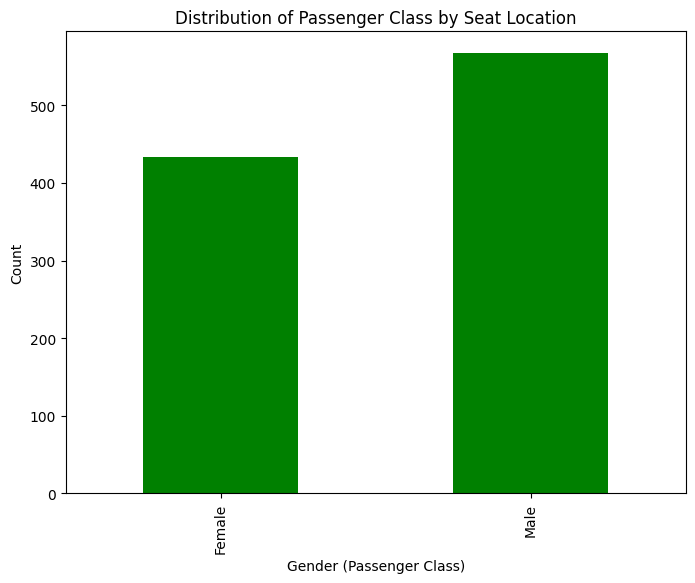

In [54]:
   # 2.) thống kế số lượng nam và nữ
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("final-Churn-Modelling-Test-Data.csv")

# Tạo biểu đồ cột biểu thị mối quan hệ giữa tầng lớp và vị trí ngồi trên tàu
plt.figure(figsize=(8, 6))
data.groupby('Gender')['Gender'].count().plot(kind='bar', color='green')
plt.xlabel('Gender (Passenger Class)')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class by Seat Location')
plt.show()

In [ ]:
#3.) Những hành khách đến từ đâu (Cherbourg, Queenstown, Southhampton)?
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("final-Churn-Modelling-Test-Data.csv")

# Tạo biểu đồ cột biểu thị số lượng hành khách từ các điểm lên tàu
plt.figure(figsize=(8, 6))
data['geopreaphy'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Port of Embarkation')
plt.show()

In [ ]:
#4.) Ai đi một mình, ai đi với gia đình?
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("final-Churn-Modelling-Test-Data.csv")

# Tạo cột mới để xác định hành khách đi một mình hoặc đi với gia đình
data['travel_alone'] = (data['sibsp'] == 0) & (data['parch'] == 0)

# Tính tỷ lệ hành khách đi một mình và đi với gia đình
alone_count = data['travel_alone'].value_counts()
alone_percentage = alone_count / alone_count.sum()

# Trực quan hóa phân phối
plt.figure(figsize=(8, 6))
alone_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Travel Status: Alone vs. With Family')
plt.ylabel('')
plt.show()

In [ ]:
 #5.) Đưa ra nhận xét về yếu tố giúp một người sống sót.
# Tính tỷ lệ sống sót
survival_rate = data['survived'].value_counts(normalize=True)
print(survival_rate)

# Biểu đồ cột cho tỷ lệ sống sót theo giới tính
survival_by_sex = data.groupby('sex')['survived'].mean()
print(survival_by_sex)

# Trực quan hóa biểu đồ cột
survival_by_sex.plot(kind='bar')
plt.title('Tỷ lệ sống sót theo giới tính')
plt.ylabel('Tỷ lệ sống sót')
plt.show()

# Biểu đồ cột cho tỷ lệ sống sót theo tầng lớp xã hội
survival_by_class = data.groupby('pclass')['survived'].mean()
print(survival_by_class)

# Trực quan hóa biểu đồ cột
survival_by_class.plot(kind='bar')
plt.title('Tỷ lệ sống sót theo tầng lớp xã hội')
plt.ylabel('Tỷ lệ sống sót')
plt.show()

# Trực quan hóa phân phối tuổi của người sống sót và người không sống sót
plt.figure(figsize=(10, 6))
sns.histplot(data[data['survived'] == 0]['age'], label='Không sống sót', kde=True)
sns.histplot(data[data['survived'] == 1]['age'], label='Sống sót', kde=True)
plt.title('Phân phối tuổi của người sống sót và người không sống sót')
plt.xlabel('Tuổi')
plt.legend()
plt.show()

# Biểu đồ cột cho tỷ lệ sống sót theo số lượng anh chị em và vợ/chồng
survival_by_sibsp = data.groupby('sibsp')['survived'].mean()
print(survival_by_sibsp)

# Biểu đồ cột cho tỷ lệ sống sót theo số lượng cha mẹ và con cái
survival_by_parch = data.groupby('parch')['survived'].mean()
print(survival_by_parch)


In [ ]:
#Quy trình phân tích trên tập dữ liệu: Những câu hỏi cần đặt ra khi phân tích
    #1.) Khảo sát phân phối hết các cột và mối liên hệ của các cột

import seaborn as sns
import matplotlib.pyplot as plt

# Tạo pairplot cho các cột số (age, fare, sibsp, parch)
numeric_columns = ['age', 'fare', 'sibsp', 'parch']
sns.pairplot(data[numeric_columns])
plt.show()


# Tạo heatmap cho ma trận tương quan giữa các cột số
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Biểu đồ phân phối của tuổi (age)
sns.histplot(data['age'], kde=True)
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.title('Phân phối tuổi')
plt.show()

# Biểu đồ hộp cho giá vé (fare) theo tầng lớp xã hội (pclass)
sns.boxplot(x='pclass', y='fare', data=data)
plt.xlabel('Tầng lớp xã hội')
plt.ylabel('Giá vé')
plt.title('Biểu đồ hộp cho giá vé theo tầng lớp xã hội')
plt.show()


# Biểu đồ đếm số lượng hành khách theo giới tính
sns.countplot(x='sex', data=data)
plt.xlabel('Giới tính')
plt.ylabel('Số lượng hành khách')
plt.title('Biểu đồ đếm số lượng hành khách theo giới tính')
plt.show()



In [ ]:
  #2.) Tập trung vào target để khai thác các yếu tố liên quan (sống vs chết)
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ sống sót theo giới tính
sns.countplot(x='sex', hue='survival', data=data)
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.title('Biểu đồ sống sót theo giới tính')
plt.show()

# Biểu đồ sống sót theo tầng lớp xã hội
sns.countplot(x='pclass', hue='survival', data=data)
plt.xlabel('Tầng lớp xã hội')
plt.ylabel('Số lượng')
plt.title('Biểu đồ sống sót theo tầng lớp xã hội')
plt.show()

# Biểu đồ phân phối độ tuổi của người sống sót và người không sống sót
sns.kdeplot(data[data['survival'] == 0]['age'], label='Không sống sót', shade=True)
sns.kdeplot(data[data['survival'] == 1]['age'], label='Sống sót', shade=True)
plt.xlabel('Tuổi')
plt.ylabel('Phân phối')
plt.title('Biểu đồ phân phối độ tuổi của người sống sót và người không sống sót')
plt.legend()
plt.show()

# Tính tỷ lệ sống sót trung bình theo giới tính
survival_by_gender = data.groupby('sex')['survival'].mean()
print("Tỷ lệ sống sót theo giới tính:")
print(survival_by_gender)

# Tính tỷ lệ sống sót trung bình theo tầng lớp xã hội
survival_by_class = data.groupby('pclass')['survival'].mean()
print("\nTỷ lệ sống sót theo tầng lớp xã hội:")
print(survival_by_class)

In [ ]:
 #3.) Tỉ lệ sống theo:

     #   - giới tính
# Tính tỷ lệ sống sót theo giới tính
survival_by_gender = data.groupby('sex')['survival'].mean()
print("Tỷ lệ sống sót theo giới tính:")
print(survival_by_gender)


     #  - trẻ con hay người lớn
# Tạo một biến "age_group" để xác định trẻ con và người lớn
data['age_group'] = data['age'].apply(lambda x: 'Trẻ con' if x < 18 else 'Người lớn')

# Tính tỷ lệ sống sót theo độ tuổi
survival_by_age_group = data.groupby('age_group')['survival'].mean()
print("\nTỷ lệ sống sót theo độ tuổi:")
print(survival_by_age_group)


     #   - theo class
# Tính tỷ lệ sống sót theo tầng lớp xã hội
survival_by_class = data.groupby('pclass')['survival'].mean()
print("\nTỷ lệ sống sót theo tầng lớp xã hội:")
print(survival_by_class)


     #  - đi 1 mình hay với gia đình
# Tính tỷ lệ sống sót theo việc đi một mình hay với gia đình
survival_by_family = data.groupby('alone')['survival'].mean()
print("\nTỷ lệ sống sót theo việc đi một mình hay với gia đình:")
print(survival_by_family)


     #   - số anh chị em
# Tính tỷ lệ sống sót theo số anh chị em và số cha mẹ/con cái
survival_by_siblings = data.groupby('sibsp')['survival'].mean()
survival_by_parents = data.groupby('parch')['survival'].mean()
print("\nTỷ lệ sống sót theo số anh chị em:")
print(survival_by_siblings)
print("\nTỷ lệ sống sót theo số cha mẹ/con cái:")
print(survival_by_parents)


     #  - vị trí chỗ ngồi
# Tính tỷ lệ sống sót theo vị trí chỗ ngồi và nơi lên tàu
survival_by_cabin = data.groupby('cabin')['survival'].mean()
survival_by_embarked = data.groupby('embarked')['survival'].mean()
print("\nTỷ lệ sống sót theo vị trí chỗ ngồi:")
print(survival_by_cabin)
print("\nTỷ lệ sống sót theo nơi lên tàu:")
print(survival_by_embarked)


     #   - đến từ đâu, ...

In [ ]:
 #4.) Đưa ra kết luận về phân phối của toàn bộ dữ liệu

     #   4.1) Phụ nữ sống nhiều hơn
import matplotlib.pyplot as plt

# Tạo biểu đồ hình bánh
survival_by_gender = data.groupby('sex')['survival'].mean()
plt.pie(survival_by_gender, labels=survival_by_gender.index, autopct='%1.1f%%')
plt.title('Tỷ lệ sống sót theo giới tính')
plt.show()


     #   4.2) Trẻ em sống nhiều hơn
child_passengers = data[data['age'] < 18]

survival_rate_children = child_passengers['survival'].mean()

adult_passengers = data[data['age'] >= 18]
survival_rate_adults = adult_passengers['survival'].mean()

adult_passengers = data[data['age'] >= 18]
survival_rate_adults = adult_passengers['survival'].mean()


In [ ]:
     #  4.3) class 1 sống nhiều hơn
     '''
     Khám phá phân phối tỷ lệ sống sót theo từng lớp hành khách:

Tạo tập dữ liệu con cho từng lớp hành khách (lớp 1, lớp 2 và lớp 3).
Tính tỷ lệ sống sót trung bình cho mỗi lớp.
     '''
first_class_passengers = data[data['Pclass'] == 1]
second_class_passengers = data[data['Pclass'] == 2]
third_class_passengers = data[data['Pclass'] == 3]

survival_rate_first_class = first_class_passengers['survival'].mean()
survival_rate_second_class = second_class_passengers['survival'].mean()
survival_rate_third_class = third_class_passengers['survival'].mean()

'''
So sánh tỷ lệ sống sót giữa các lớp hành khách:
Dựa trên tỷ lệ sống sót của từng lớp, so sánh chúng để xem lớp nào có tỷ lệ sống sót cao nhất.
'''

if survival_rate_first_class > survival_rate_second_class and survival_rate_first_class > survival_rate_third_class:
    conclusion = "Lớp hành khách 1 có tỷ lệ sống sót cao nhất."
elif survival_rate_second_class > survival_rate_first_class and survival_rate_second_class > survival_rate_third_class:
    conclusion = "Lớp hành khách 2 có tỷ lệ sống sót cao nhất."
else:
    conclusion = "Lớp hành khách 3 có tỷ lệ sống sót cao nhất hoặc tương đương."

print(conclusion)

In [ ]:
     #  4.4) vị trí chổ ngồi
# Hiển thị thông tin mẫu về vị trí chỗ ngồi
print(data['cabin'].head())

'''
Kiểm tra số lượng giá trị bị thiếu (missing values):
Đếm số lượng giá trị bị thiếu trong cột vị trí chỗ ngồi.
'''
missing_cabin_count = data['cabin'].isnull().sum()

'''
Phân tích tỷ lệ sống sót dựa trên có hoặc không có thông tin vị trí chỗ ngồi:
Tạo hai tập dữ liệu con: một cho hành khách có thông tin vị trí chỗ ngồi 
và một cho hành khách không có thông tin.
'''
passengers_with_cabin = data[~data['cabin'].isnull()]
passengers_without_cabin = data[data['cabin'].isnull()]

'''
Tính tỷ lệ sống sót cho cả hai nhóm và so sánh:
Tính tỷ lệ sống sót trung bình cho cả hai nhóm và so sánh chúng.
'''
survival_rate_with_cabin = passengers_with_cabin['survival'].mean()
survival_rate_without_cabin = passengers_without_cabin['survival'].mean()


'''
So sánh tỷ lệ sống sót giữa hai nhóm:
Dựa trên tỷ lệ sống sót của cả hai nhóm, 
so sánh để xem xem hành khách có thông tin vị trí chỗ ngồi (Cabin) có tỷ lệ sống sót cao hơn hay không.
'''
if survival_rate_with_cabin > survival_rate_without_cabin:
    conclusion = "Hành khách có thông tin vị trí chỗ ngồi (Cabin) có tỷ lệ sống sót cao hơn."
else:
    conclusion = "Hành khách không có thông tin vị trí chỗ ngồi (Cabin) có tỷ lệ sống sót cao hơn hoặc tương đương."

print(conclusion)

In [ ]:

     #  4.5) đến từ đâu

# Hiển thị thông tin mẫu về nơi xuất phát
print(data['embarked'].head())

'''
Kiểm tra số lượng giá trị bị thiếu (missing values):
Đếm số lượng giá trị bị thiếu trong cột nơi xuất phát.
'''
missing_embarked_count = data['embarked'].isnull().sum()

'''
Phân tích tỷ lệ sống sót dựa trên nơi xuất phát:
Tạo các tập dữ liệu con cho mỗi giá trị nơi xuất phát (Cherbourg, Queenstown, Southampton).
'''
passengers_cherbourg = data[data['embarked'] == 'C']
passengers_queenstown = data[data['embarked'] == 'Q']
passengers_southampton = data[data['embarked'] == 'S']

'''
Tính tỷ lệ sống sót cho mỗi nhóm và so sánh:
Tính tỷ lệ sống sót trung bình cho từng nhóm nơi xuất phát 
và so sánh chúng.
'''
survival_rate_cherbourg = passengers_cherbourg['survival'].mean()
survival_rate_queenstown = passengers_queenstown['survival'].mean()
survival_rate_southampton = passengers_southampton['survival'].mean()


'''
So sánh tỷ lệ sống sót giữa các nhóm nơi xuất phát:
Dựa trên tỷ lệ sống sót của từng nhóm nơi xuất phát, 
so sánh để xem xem có sự tác động từ nơi xuất phát đối với 
tỷ lệ sống sót hay không.
'''
# Tạo một danh sách các tỷ lệ sống sót
survival_rates = [survival_rate_cherbourg, survival_rate_queenstown, survival_rate_southampton]

# Tìm giá trị lớn nhất
max_survival_rate = max(survival_rates)

# Tìm nơi xuất phát tương ứng với tỷ lệ sống sót cao nhất
if max_survival_rate == survival_rate_cherbourg:
    best_origin = "Cherbourg"
elif max_survival_rate == survival_rate_queenstown:
    best_origin = "Queenstown"
else:
    best_origin = "Southampton"


'''
In kết luận cuối cùng:
In ra nơi xuất phát có tỷ lệ sống sót cao nhất 
và kết luận về tác động của nơi xuất phát đối 
với tỷ lệ sống sót trong tập dữ liệu Titanic
'''
print(f"Nơi xuất phát có tỷ lệ sống sót cao nhất là: {best_origin}")


In [ ]:
#  4.6) độ tuổi
   

'''
1. Khám phá dữ liệu về độ tuổi (Age):
In thông tin về dữ liệu về độ tuổi để hiểu cấu trúc của nó.
'''
# In thông tin mẫu về độ tuổi
print(data['age'].head())


'''
2. Kiểm tra số lượng giá trị bị thiếu (missing values):
Đếm số lượng giá trị bị thiếu trong cột độ tuổi.
'''
missing_age_count = data['age'].isnull().sum()


'''
3. Phân chia độ tuổi thành các nhóm (Age Groups):
Tạo các nhóm độ tuổi để thực hiện phân tích dễ dàng hơn. 
Ví dụ: nhóm trẻ em (dưới 18 tuổi), người trưởng thành 
(từ 18 đến 65 tuổi), và người cao tuổi (trên 65 tuổi).
'''
def categorize_age(age):
    if age < 18:
        return "Trẻ em"
    elif age < 65:
        return "Người trưởng thành"
    else:
        return "Người cao tuổi"

data['age_group'] = data['age'].apply(categorize_age)


'''
4. Tính tỷ lệ sống sót cho từng nhóm độ tuổi:
Tính tỷ lệ sống sót trung bình cho từng nhóm độ tuổi 
và so sánh chúng.
'''
survival_rate_children = data[data['age_group'] == 'Trẻ em']['survival'].mean()
survival_rate_adults = data[data['age_group'] == 'Người trưởng thành']['survival'].mean()
survival_rate_seniors = data[data['age_group'] == 'Người cao tuổi']['survival'].mean()


In [57]:
'''
5. So sánh tỷ lệ sống sót giữa các nhóm độ tuổi:
Dựa trên tỷ lệ sống sót của từng nhóm độ tuổi, 
so sánh để xem xem có sự tác động từ độ tuổi đối với tỷ lệ sống sót hay không.
'''
# Tạo một danh sách các tỷ lệ sống sót của từng nhóm độ tuổi
survival_rates = [survival_rate_children, survival_rate_adults, survival_rate_seniors]

# Xác định nhóm có tỷ lệ sống sót cao nhất
best_age_group = None
max_survival_rate = max(survival_rates)

if max_survival_rate == survival_rate_children:
    best_age_group = "Trẻ em"
elif max_survival_rate == survival_rate_adults:
    best_age_group = "Người trưởng thành"
elif max_survival_rate == survival_rate_seniors:
    best_age_group = "Người cao tuổi"

# In ra nhóm độ tuổi có tỷ lệ sống sót cao nhất
print(f"Nhóm có tỷ lệ sống sót cao nhất là: {best_age_group} với tỷ lệ sống sót {max_survival_rate * 100:.2f}%")


NameError: name 'survival_rate_children' is not defined